In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

# Carga de datos

In [2]:
datos = pd.read_csv('heart_cleveland_upload.csv')

In [3]:
datos.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
datos.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Identificar valores nulos

In [6]:
print("Valores faltantes por columna:\n", datos.isnull().sum())

Valores faltantes por columna:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [7]:
print(datos.dtypes)

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object


<Figure size 1200x800 with 0 Axes>

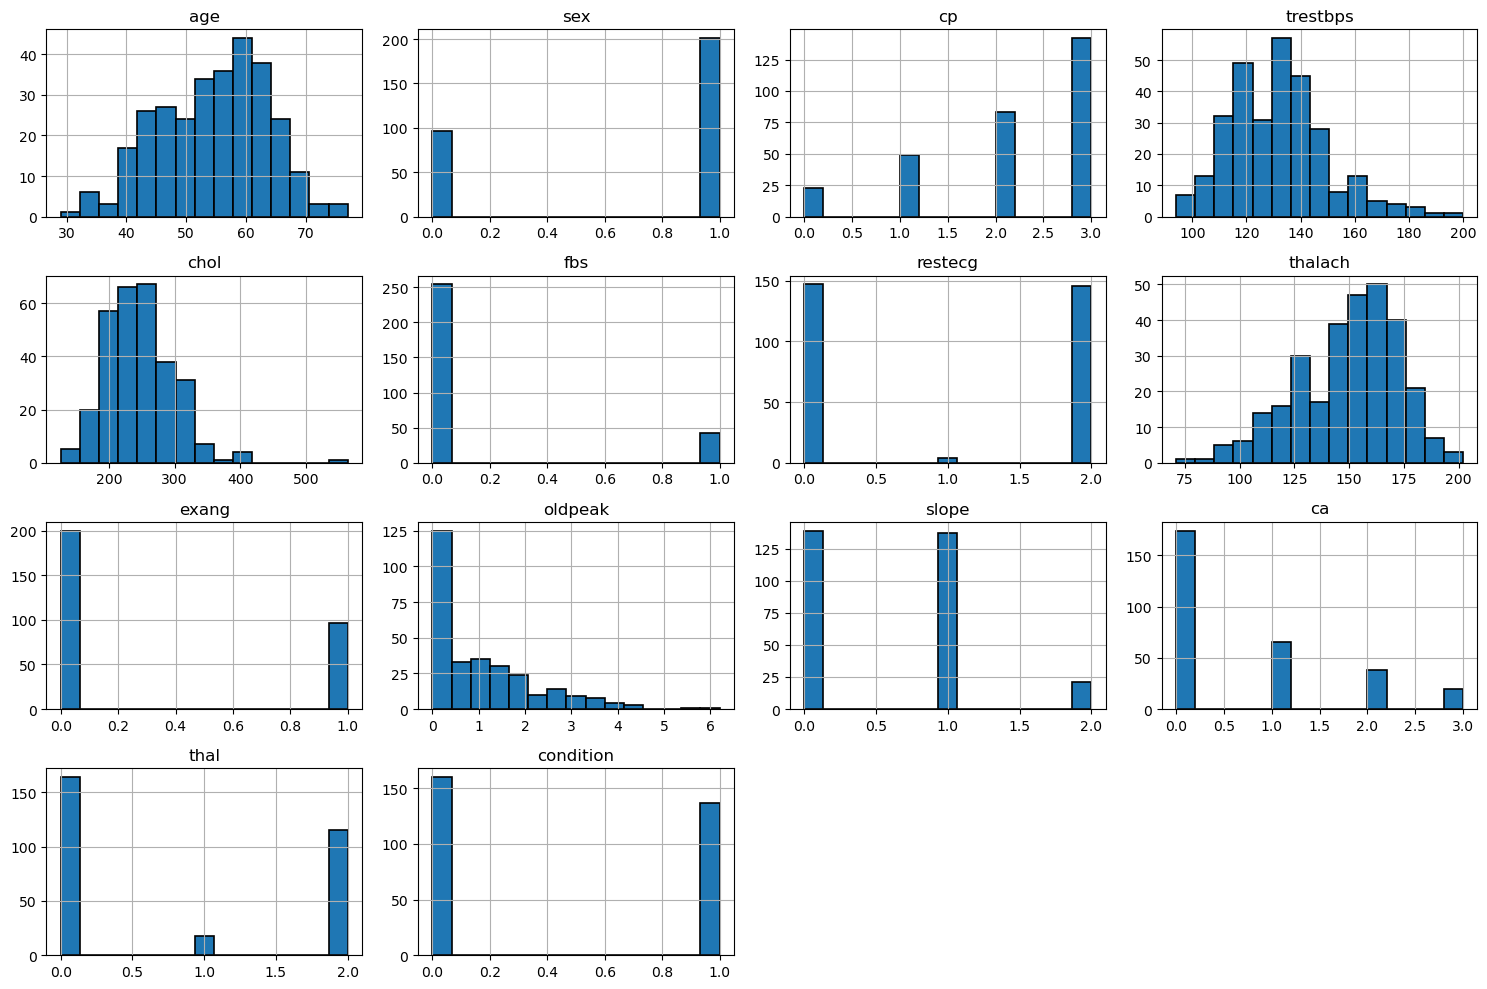

In [8]:
plt.figure(figsize=(12, 8))
datos.hist(bins=15, edgecolor='black', linewidth=1.2, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Analisis exploratorio y procesamiento de los datos

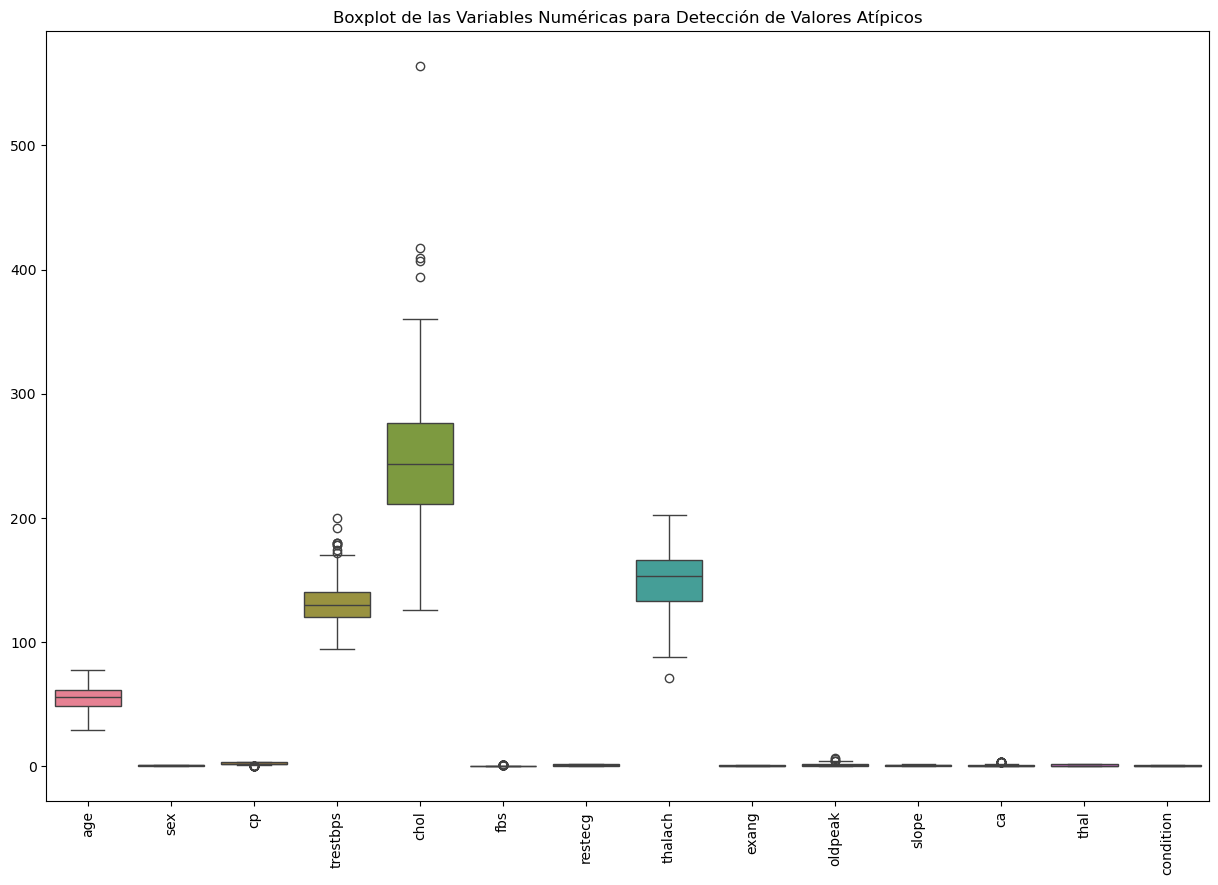

In [9]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=datos)
plt.title('Boxplot de las Variables Numéricas para Detección de Valores Atípicos')
plt.xticks(rotation=90)
plt.show()

In [10]:
# Ultilizamos el q1, para determinar el valor atipico de estas variables de interses
#*trestbps
#*chol
#*thalach
#*oldpeak

In [11]:
#IDENTIFICAMOS LOS VALORES ATIPICOS DE CHOL
Q1 = datos['chol'].quantile(0.25)
Q3 = datos['chol'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [12]:
valores_atipicos = datos[(datos['chol'] < limite_inferior) | (datos['chol'] > limite_superior)]
print("Valores atípicos de 'chol':")
print(valores_atipicos['chol'])

Valores atípicos de 'chol':
79     564
83     417
180    407
188    394
238    409
Name: chol, dtype: int64


In [13]:
media_chol = datos['chol'].mean()
datos['chol'] = datos['chol'].where((datos['chol'] >= limite_inferior) & (datos['chol'] <= limite_superior), media_chol)

In [14]:
valores_atipicos_despues = datos[(datos['chol'] < limite_inferior) | (datos['chol'] > limite_superior)]
print(f"Número de valores atípicos después: {valores_atipicos_despues.shape[0]}")

Número de valores atípicos después: 0


In [15]:
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")
print("Valores atípicos después del reemplazo:")
print(valores_atipicos_despues['chol'])

Límite inferior: 113.5
Límite superior: 373.5
Valores atípicos después del reemplazo:
Series([], Name: chol, dtype: float64)


In [16]:
#IDENTIFICAMOS LOS VALORES ATIPICOS DE trestbps
Q1 = datos['trestbps'].quantile(0.25)
Q3 = datos['trestbps'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [17]:
valores_atipicos = datos[(datos['trestbps'] < limite_inferior) | (datos['trestbps'] > limite_superior)]
print("Valores atípicos de 'tresbps':")
print(valores_atipicos['trestbps'])

Valores atípicos de 'tresbps':
9      178
45     192
76     180
117    172
167    178
178    180
209    174
234    200
242    180
Name: trestbps, dtype: int64


In [18]:
media_chol = datos['trestbps'].mean()
datos['trestbps'] = datos['trestbps'].where((datos['trestbps'] >= limite_inferior) & (datos['trestbps'] <= limite_superior), media_chol)

In [19]:
valores_atipicos_despues = datos[(datos['trestbps'] < limite_inferior) | (datos['trestbps'] > limite_superior)]
print(f"Número de valores atípicos después: {valores_atipicos_despues.shape[0]}")

Número de valores atípicos después: 0


In [20]:
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")
print("Valores atípicos después del reemplazo:")
print(valores_atipicos_despues['trestbps'])

Límite inferior: 90.0
Límite superior: 170.0
Valores atípicos después del reemplazo:
Series([], Name: trestbps, dtype: float64)


In [21]:
#IDENTIFICAMOS LOS VALORES ATIPICOS DE THALACH
Q1 = datos['thalach'].quantile(0.25)
Q3 = datos['thalach'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [22]:
valores_atipicos = datos[(datos['thalach'] < limite_inferior) | (datos['thalach'] > limite_superior)]
print("Valores atípicos de 'thalach':")
print(valores_atipicos['thalach'])

Valores atípicos de 'thalach':
164    71
Name: thalach, dtype: int64


In [23]:
media_chol = datos['thalach'].mean()
datos['thalach'] = datos['thalach'].where((datos['thalach'] >= limite_inferior) & (datos['thalach'] <= limite_superior), media_chol)

In [24]:
valores_atipicos_despues = datos[(datos['thalach'] < limite_inferior) | (datos['thalach'] > limite_superior)]
print(f"Número de valores atípicos después: {valores_atipicos_despues.shape[0]}")

Número de valores atípicos después: 0


In [25]:
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")
print("Valores atípicos después del reemplazo:")
print(valores_atipicos_despues['chol'])

Límite inferior: 83.5
Límite superior: 215.5
Valores atípicos después del reemplazo:
Series([], Name: chol, dtype: float64)


In [26]:
#IDENTIFICAMOS LOS VALORES ATIPICOS DE OLDPEAK Y LOS REMPLAZAMOS POR LA MEDIA
Q1 = datos['oldpeak'].quantile(0.25)
Q3 = datos['oldpeak'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [27]:
valores_atipicos = datos[(datos['oldpeak'] < limite_inferior) | (datos['oldpeak'] > limite_superior)]
print("Valores atípicos de 'oldpeak':")
print(valores_atipicos['oldpeak'])

Valores atípicos de 'oldpeak':
9      4.2
186    6.2
213    4.4
239    5.6
260    4.2
Name: oldpeak, dtype: float64


In [28]:
media_chol = datos['oldpeak'].mean()
datos['oldpeak'] = datos['oldpeak'].where((datos['oldpeak'] >= limite_inferior) & (datos['oldpeak'] <= limite_superior), media_chol)

In [29]:
valores_atipicos_despues = datos[(datos['oldpeak'] < limite_inferior) | (datos['oldpeak'] > limite_superior)]
print(f"Número de valores atípicos después: {valores_atipicos_despues.shape[0]}")

Número de valores atípicos después: 0


In [30]:
print(f"Límite inferior: {limite_inferior}")
print(f"Límite superior: {limite_superior}")
print("Valores atípicos después del reemplazo:")
print(valores_atipicos_despues['chol'])

Límite inferior: -2.4000000000000004
Límite superior: 4.0
Valores atípicos después del reemplazo:
Series([], Name: chol, dtype: float64)


In [31]:
# convertimos las variables que contengas mas de 2 categorias en dummies
variables_categoricas = ['cp', 'restecg', 'slope', 'thal', 'ca']

In [32]:
dummies = pd.get_dummies(datos[variables_categoricas], drop_first=True)

In [33]:
datos = pd.concat([datos.drop(variables_categoricas, axis=1), dummies], axis=1)

In [34]:
# Elegimos las variables que tengan mas correlacion con la variable objetivo (condition) rango de correelacion(>0.3 o <-0.3)
correlacion = datos.corr()
print(correlacion['condition'].sort_values(ascending=False))

condition    1.000000
thal         0.520516
ca           0.463189
oldpeak      0.426208
exang        0.421355
cp           0.408945
slope        0.333049
sex          0.278467
age          0.227075
restecg      0.166343
trestbps     0.130561
chol         0.111044
fbs          0.003167
thalach     -0.419765
Name: condition, dtype: float64


In [35]:
#DEFINIMOS LAS VARIABLES PREDICTORAR (X) Y LA VARIABLE OBJETIVO(Y)
x = datos[['thal', 'ca', 'oldpeak', 'exang', 'cp', 'slope', 'thalach']]
y = datos['condition']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
print (x_train)

     thal  ca  oldpeak  exang  cp  slope  thalach
273     2   2      1.8      1   3      1    120.0
259     2   0      1.2      1   3      1    142.0
30      0   0      0.0      1   1      0    164.0
22      0   0      0.0      0   0      0    174.0
277     2   3      0.0      1   3      1    147.0
..    ...  ..      ...    ...  ..    ...      ...
188     0   0      1.2      0   3      1    157.0
71      0   0      0.0      0   1      0    202.0
106     1   1      0.6      1   2      1    142.0
270     0   1      1.0      1   3      1    118.0
102     0   0      0.0      0   2      0    165.0

[237 rows x 7 columns]


In [38]:
print (y_train)

273    1
259    1
30     0
22     0
277    1
      ..
188    0
71     0
106    1
270    1
102    0
Name: condition, Length: 237, dtype: int64


In [39]:
print(f"Tamaño del conjunto de entrenamiento: {x_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {x_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 237
Tamaño del conjunto de prueba: 60


In [40]:
## Para ajustar el modelo de regresion logistica (logisticregression)
#INICIAMOS EL MODELO
modelo = LogisticRegression(max_iter=1000)  # max_iter puede ajustarse según sea necesario

In [41]:
# ajustamos el modelo de los datos de entrenamiento
modelo.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [42]:
predicciones = modelo.predict(x_test)

In [43]:
precision = accuracy_score(y_test, predicciones)
print(f"Precisión del modelo: {precision}")

Precisión del modelo: 0.8333333333333334


In [44]:
informe = classification_report(y_test, predicciones)
print("Informe de clasificación:\n", informe)

Informe de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



In [ ]:
#verdaderos_negativos = cm[0, 0]
#falsos_positivos = cm[0, 1]
#falsos_negativos = cm[1, 0]
#verdaderos_positivos = cm[1, 1]


from sklearn.metrics import confusion_matrix

# ... (your model training and prediction code)

y_true = # True labels
y_pred = # Predicted labels

cm = confusion_matrix(y_true, y_pred)

verdaderos_negativos = cm[0, 0]
falsos_positivos = cm[0, 1]
falsos_negativos = cm[1, 0]

NameError: name 'cm' is not defined

In [ ]:
print("Verdaderos negativos:", verdaderos_negativos)
print("Verdaderos positivos:", verdaderos_positivos)
print("Falsos positivos:", falsos_positivos)
print("Falsos negativos:", falsos_negativos)

Verdaderos negativos: 28
Verdaderos positivos: 22
Falsos positivos: 4
Falsos negativos: 6


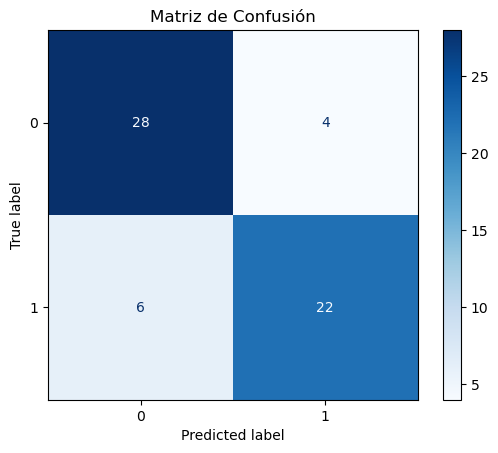

In [ ]:
cm = confusion_matrix(y_test, predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

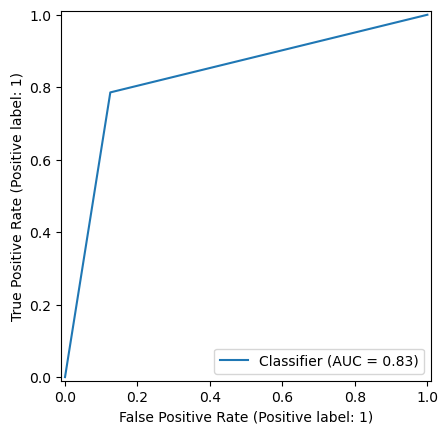

In [ ]:
RocCurveDisplay.from_predictions(y_test, predicciones)
plt.show()